Loaded shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               

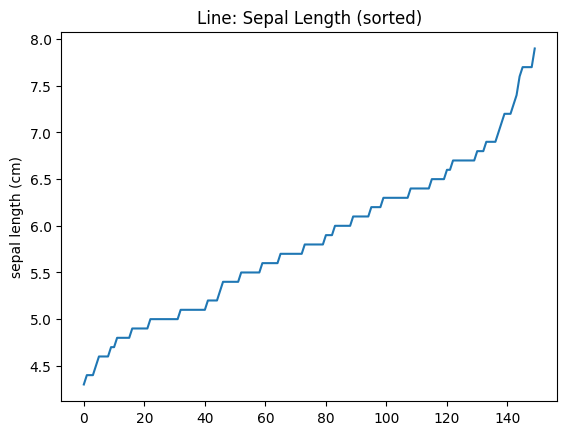

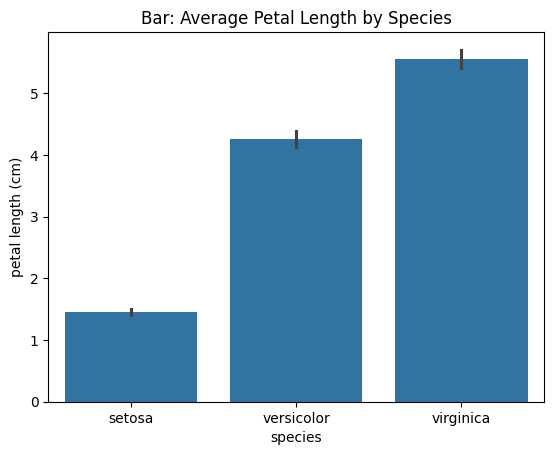

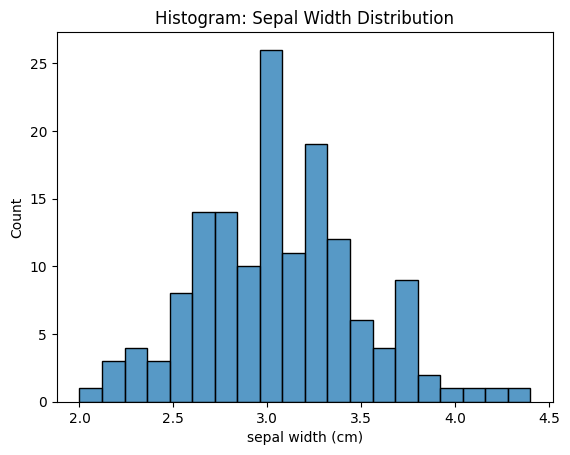

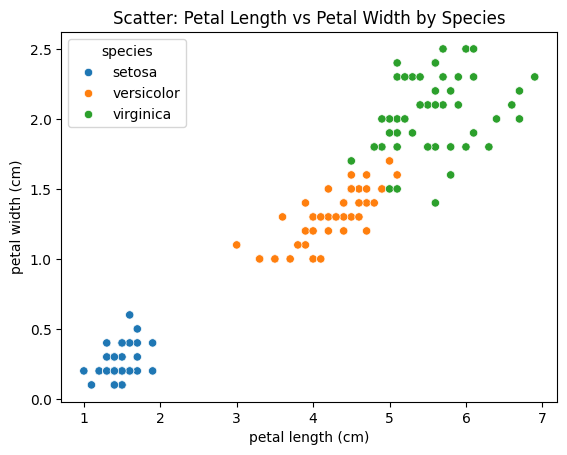

In [20]:
# Import the libraries we need
# choose the dataset(Iris)
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris dataset to make a DataFrame and save it as a CSV file
iris=load_iris(as_frame=True)
df=iris.frame

# Make a clean DataFrame with readable species names
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))
df = df.drop(columns=["target"])   # we now have species names

# # Save once as CSV 
csv_path = "iris.csv"
if not os.path.exists(csv_path):
    df.to_csv(csv_path, index=False)

# Read back from CSV (to show you can load CSV with pandas)
data = pd.read_csv(csv_path)
data.head()

# Task 1.2 Load the dataset using pandas from the csv file
data = pd.read_csv("iris.csv")
print("Loaded shape:", data.shape)
print(data.head())

# Task 1.3 Display the first few rows of the dataset using .head() to inspect the data.
print(data.head())

# Task 1.4 Explore the structure of the dataset by checking the data types and any missing values.
print("column types:\n", data.dtypes, "\n")
print("missing values per column:\n", data.isnull().sum())

#Task 1.5 Clean the dataset by either filling or dropping any missing values.
data = data.dropna()  # Drop rows with missing values

#Task 1.5b Fill missing values (numeric -> mean, categorical -> mode)
filled = data.copy()
# Fill numeric columns with mean
num_cols = filled.select_dtypes(include="number").columns
filled[num_cols] = filled[num_cols].fillna(filled[num_cols].mean())

# Fill categorical columns (like 'species') with mode
cat_cols = filled.select_dtypes(exclude="number").columns
for c in cat_cols:
    if filled[c].isna().any():
        filled[c] = filled[c].fillna(filled[c].mode()[0])

#Task 2: Basic Data Analysis
#Task 2.1 Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().
stats = filled.describe()
stats
#Task 2.2 Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.
grouped = filled.groupby("species").mean()
grouped
#Task 2.3 Identify any patterns or interesting findings from the analysis and print a message.
# which species has the highest average petal length?
pl_series = grouped["petal length (cm)"]
msg = []
msg.append(f"Highest avg petal length: {pl_series.idxmax()} ({pl_series.max():.2f} cm)")
msg.append(f"Lowest avg petal length: {pl_series.idxmin()} ({pl_series.min():.2f} cm)")
print("\n".join(msg))

# Task 3: Data Visualization
# Task 3.1 Create a Line Chart
sns.lineplot(data=filled.sort_values("sepal length (cm)"), y="sepal length (cm)", x=range(len(filled)))
plt.title("Line: Sepal Length (sorted)")
plt.show()

#Task 3.2 Create a Bar Chart
sns.barplot(data=filled, x="species", y="petal length (cm)")
plt.title("Bar: Average Petal Length by Species")
plt.show()

#Task 3.3 Create a histogram
sns.histplot(data=filled, x="sepal width (cm)", bins=20)
plt.title("Histogram: Sepal Width Distribution")
plt.show()

#Task 3.4 Create a scatter plot
sns.scatterplot(data=filled, x="petal length (cm)", y="petal width (cm)", hue="species")
plt.title("Scatter: Petal Length vs Petal Width by Species")
plt.show()

